# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.exclude_past)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 17616 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.exclude_past)


  0% (    1 of 17616) |           | Elapsed Time: 0:00:26 ETA:  5 days, 10:39:18

  0% (   80 of 17616) |                    | Elapsed Time: 0:00:27 ETA:  0:03:15

  0% (  166 of 17616) |                    | Elapsed Time: 0:00:28 ETA:  0:03:05

  1% (  221 of 17616) |                    | Elapsed Time: 0:00:29 ETA:  0:03:05

  1% (  301 of 17616) |                    | Elapsed Time: 0:00:30 ETA:  0:03:06

  2% (  370 of 17616) |                    | Elapsed Time: 0:00:31 ETA:  0:03:12

  2% (  441 of 17616) |                    | Elapsed Time: 0:00:32 ETA:  0:03:13

  2% (  526 of 17616) |                    | Elapsed Time: 0:00:33 ETA:  0:03:09

  3% (  613 of 17616) |                    | Elapsed Time: 0:00:34 ETA:  0:03:05

  3% (  661 of 17616) |                    | Elapsed Time: 0:00:34 ETA:  0:03:04

  4% (  743 of 17616) |                    | Elapsed Time: 0:00:35 ETA:  0:03:02

  4% (  827 of 17616) |                    | Elapsed Time: 0:00:36 ETA:  0:03:02

  5% (  881 of 17616) |#                   | Elapsed Time: 0:00:37 ETA:  0:03:01

  5% (  963 of 17616) |#                   | Elapsed Time: 0:00:38 ETA:  0:03:00

  5% ( 1047 of 17616) |#                   | Elapsed Time: 0:00:39 ETA:  0:02:54

  6% ( 1101 of 17616) |#                   | Elapsed Time: 0:00:40 ETA:  0:02:51

  6% ( 1185 of 17616) |#                   | Elapsed Time: 0:00:41 ETA:  0:02:50

  7% ( 1270 of 17616) |#                   | Elapsed Time: 0:00:42 ETA:  0:02:50

  7% ( 1322 of 17616) |#                   | Elapsed Time: 0:00:42 ETA:  0:02:48

  7% ( 1403 of 17616) |#                   | Elapsed Time: 0:00:43 ETA:  0:02:48

  8% ( 1482 of 17616) |#                   | Elapsed Time: 0:00:44 ETA:  0:02:48

  8% ( 1506 of 17616) |#                   | Elapsed Time: 0:00:45 ETA:  0:03:10

  8% ( 1542 of 17616) |#                   | Elapsed Time: 0:00:46 ETA:  0:03:12

  9% ( 1621 of 17616) |#                   | Elapsed Time: 0:00:47 ETA:  0:03:13

  9% ( 1701 of 17616) |#                   | Elapsed Time: 0:00:48 ETA:  0:03:12

 10% ( 1762 of 17616) |##                  | Elapsed Time: 0:00:49 ETA:  0:03:14

 10% ( 1843 of 17616) |##                  | Elapsed Time: 0:00:50 ETA:  0:03:14

 10% ( 1925 of 17616) |##                  | Elapsed Time: 0:00:51 ETA:  0:03:13

 11% ( 1982 of 17616) |##                  | Elapsed Time: 0:00:51 ETA:  0:03:13

 11% ( 2062 of 17616) |##                  | Elapsed Time: 0:00:52 ETA:  0:03:11

 12% ( 2144 of 17616) |##                  | Elapsed Time: 0:00:53 ETA:  0:02:45

 12% ( 2202 of 17616) |##                  | Elapsed Time: 0:00:54 ETA:  0:02:43

 12% ( 2284 of 17616) |##                  | Elapsed Time: 0:00:55 ETA:  0:02:41

 13% ( 2362 of 17616) |##                  | Elapsed Time: 0:00:56 ETA:  0:02:41

 13% ( 2423 of 17616) |##                  | Elapsed Time: 0:00:57 ETA:  0:02:41

 14% ( 2500 of 17616) |##                  | Elapsed Time: 0:00:58 ETA:  0:02:41

 14% ( 2577 of 17616) |##                  | Elapsed Time: 0:00:59 ETA:  0:02:42

 15% ( 2643 of 17616) |###                 | Elapsed Time: 0:01:00 ETA:  0:02:41

 15% ( 2723 of 17616) |###                 | Elapsed Time: 0:01:01 ETA:  0:02:41

 15% ( 2807 of 17616) |###                 | Elapsed Time: 0:01:02 ETA:  0:02:39

 16% ( 2863 of 17616) |###                 | Elapsed Time: 0:01:02 ETA:  0:02:38

 16% ( 2948 of 17616) |###                 | Elapsed Time: 0:01:03 ETA:  0:02:36

 17% ( 3026 of 17616) |###                 | Elapsed Time: 0:01:04 ETA:  0:02:35

 17% ( 3083 of 17616) |###                 | Elapsed Time: 0:01:05 ETA:  0:02:34

 17% ( 3164 of 17616) |###                 | Elapsed Time: 0:01:06 ETA:  0:02:32

 18% ( 3256 of 17616) |###                 | Elapsed Time: 0:01:07 ETA:  0:02:26

 18% ( 3303 of 17616) |###                 | Elapsed Time: 0:01:08 ETA:  0:02:24

 19% ( 3387 of 17616) |###                 | Elapsed Time: 0:01:09 ETA:  0:02:21

 19% ( 3470 of 17616) |###                 | Elapsed Time: 0:01:10 ETA:  0:02:20

 20% ( 3524 of 17616) |####                | Elapsed Time: 0:01:10 ETA:  0:02:20

 20% ( 3611 of 17616) |####                | Elapsed Time: 0:01:11 ETA:  0:02:18

 20% ( 3693 of 17616) |####                | Elapsed Time: 0:01:12 ETA:  0:02:16

 21% ( 3744 of 17616) |####                | Elapsed Time: 0:01:13 ETA:  0:02:15

 21% ( 3831 of 17616) |####                | Elapsed Time: 0:01:14 ETA:  0:02:12

 22% ( 3917 of 17616) |####                | Elapsed Time: 0:01:15 ETA:  0:02:13

 22% ( 3964 of 17616) |####                | Elapsed Time: 0:01:16 ETA:  0:02:13

 22% ( 4046 of 17616) |####                | Elapsed Time: 0:01:17 ETA:  0:02:13

 23% ( 4129 of 17616) |####                | Elapsed Time: 0:01:18 ETA:  0:02:12

 23% ( 4184 of 17616) |####                | Elapsed Time: 0:01:18 ETA:  0:02:12

 24% ( 4263 of 17616) |####                | Elapsed Time: 0:01:19 ETA:  0:02:13

 24% ( 4351 of 17616) |####                | Elapsed Time: 0:01:20 ETA:  0:02:10

 25% ( 4404 of 17616) |#####               | Elapsed Time: 0:01:21 ETA:  0:02:09

 25% ( 4481 of 17616) |#####               | Elapsed Time: 0:01:22 ETA:  0:02:11

 25% ( 4559 of 17616) |#####               | Elapsed Time: 0:01:23 ETA:  0:02:13

 26% ( 4625 of 17616) |#####               | Elapsed Time: 0:01:24 ETA:  0:02:13

 26% ( 4708 of 17616) |#####               | Elapsed Time: 0:01:25 ETA:  0:02:12

 26% ( 4722 of 17616) |#####               | Elapsed Time: 0:01:26 ETA:  0:02:41

 27% ( 4798 of 17616) |#####               | Elapsed Time: 0:01:27 ETA:  0:02:41

 27% ( 4845 of 17616) |#####               | Elapsed Time: 0:01:28 ETA:  0:02:42

 27% ( 4925 of 17616) |#####               | Elapsed Time: 0:01:29 ETA:  0:02:44

 28% ( 5002 of 17616) |#####               | Elapsed Time: 0:01:30 ETA:  0:02:44

 28% ( 5065 of 17616) |#####               | Elapsed Time: 0:01:30 ETA:  0:02:44

 29% ( 5150 of 17616) |#####               | Elapsed Time: 0:01:31 ETA:  0:02:41

 29% ( 5232 of 17616) |#####               | Elapsed Time: 0:01:32 ETA:  0:02:39

 30% ( 5285 of 17616) |######              | Elapsed Time: 0:01:33 ETA:  0:02:40

 30% ( 5374 of 17616) |######              | Elapsed Time: 0:01:34 ETA:  0:02:05

 30% ( 5460 of 17616) |######              | Elapsed Time: 0:01:35 ETA:  0:02:01

 31% ( 5505 of 17616) |######              | Elapsed Time: 0:01:36 ETA:  0:02:00

 31% ( 5589 of 17616) |######              | Elapsed Time: 0:01:37 ETA:  0:01:57

 32% ( 5676 of 17616) |######              | Elapsed Time: 0:01:38 ETA:  0:01:53

 32% ( 5726 of 17616) |######              | Elapsed Time: 0:01:38 ETA:  0:01:50

 32% ( 5810 of 17616) |######              | Elapsed Time: 0:01:39 ETA:  0:01:50

 33% ( 5896 of 17616) |######              | Elapsed Time: 0:01:40 ETA:  0:01:47

 33% ( 5946 of 17616) |######              | Elapsed Time: 0:01:41 ETA:  0:01:49

 34% ( 6023 of 17616) |######              | Elapsed Time: 0:01:42 ETA:  0:01:52

 34% ( 6106 of 17616) |######              | Elapsed Time: 0:01:43 ETA:  0:01:52

 35% ( 6166 of 17616) |#######             | Elapsed Time: 0:01:44 ETA:  0:01:51

 35% ( 6244 of 17616) |#######             | Elapsed Time: 0:01:45 ETA:  0:01:52

 35% ( 6331 of 17616) |#######             | Elapsed Time: 0:01:46 ETA:  0:01:51

 36% ( 6386 of 17616) |#######             | Elapsed Time: 0:01:46 ETA:  0:01:51

 36% ( 6466 of 17616) |#######             | Elapsed Time: 0:01:47 ETA:  0:01:51

 37% ( 6544 of 17616) |#######             | Elapsed Time: 0:01:49 ETA:  0:01:53

 37% ( 6606 of 17616) |#######             | Elapsed Time: 0:01:49 ETA:  0:01:51

 37% ( 6688 of 17616) |#######             | Elapsed Time: 0:01:50 ETA:  0:01:48

 38% ( 6771 of 17616) |#######             | Elapsed Time: 0:01:51 ETA:  0:01:47

 38% ( 6827 of 17616) |#######             | Elapsed Time: 0:01:52 ETA:  0:01:45

 39% ( 6909 of 17616) |#######             | Elapsed Time: 0:01:53 ETA:  0:01:43

 39% ( 6994 of 17616) |#######             | Elapsed Time: 0:01:54 ETA:  0:01:42

 40% ( 7047 of 17616) |########            | Elapsed Time: 0:01:55 ETA:  0:01:41

 40% ( 7132 of 17616) |########            | Elapsed Time: 0:01:56 ETA:  0:01:38

 40% ( 7216 of 17616) |########            | Elapsed Time: 0:01:57 ETA:  0:01:35

 41% ( 7267 of 17616) |########            | Elapsed Time: 0:01:57 ETA:  0:01:33

 41% ( 7351 of 17616) |########            | Elapsed Time: 0:01:58 ETA:  0:01:31

 42% ( 7437 of 17616) |########            | Elapsed Time: 0:01:59 ETA:  0:01:29

 42% ( 7487 of 17616) |########            | Elapsed Time: 0:02:00 ETA:  0:01:29

 42% ( 7569 of 17616) |########            | Elapsed Time: 0:02:01 ETA:  0:01:28

 43% ( 7655 of 17616) |########            | Elapsed Time: 0:02:02 ETA:  0:01:26

 43% ( 7707 of 17616) |########            | Elapsed Time: 0:02:02 ETA:  0:01:27

 44% ( 7790 of 17616) |########            | Elapsed Time: 0:02:03 ETA:  0:01:26

 44% ( 7873 of 17616) |########            | Elapsed Time: 0:02:04 ETA:  0:01:26

 45% ( 7928 of 17616) |#########           | Elapsed Time: 0:02:05 ETA:  0:01:24

 45% ( 8013 of 17616) |#########           | Elapsed Time: 0:02:06 ETA:  0:01:23

 45% ( 8096 of 17616) |#########           | Elapsed Time: 0:02:07 ETA:  0:01:23

 46% ( 8148 of 17616) |#########           | Elapsed Time: 0:02:08 ETA:  0:01:21

 46% ( 8230 of 17616) |#########           | Elapsed Time: 0:02:09 ETA:  0:01:20

 47% ( 8314 of 17616) |#########           | Elapsed Time: 0:02:10 ETA:  0:01:20

 47% ( 8368 of 17616) |#########           | Elapsed Time: 0:02:10 ETA:  0:01:19

 47% ( 8450 of 17616) |#########           | Elapsed Time: 0:02:11 ETA:  0:01:19

 48% ( 8537 of 17616) |#########           | Elapsed Time: 0:02:12 ETA:  0:01:16

 48% ( 8588 of 17616) |#########           | Elapsed Time: 0:02:13 ETA:  0:01:16

 49% ( 8672 of 17616) |#########           | Elapsed Time: 0:02:14 ETA:  0:01:16

 49% ( 8695 of 17616) |#########           | Elapsed Time: 0:02:16 ETA:  0:01:51

 49% ( 8768 of 17616) |#########           | Elapsed Time: 0:02:17 ETA:  0:01:53

 50% ( 8808 of 17616) |##########          | Elapsed Time: 0:02:17 ETA:  0:01:57

 50% ( 8885 of 17616) |##########          | Elapsed Time: 0:02:18 ETA:  0:01:59

 50% ( 8967 of 17616) |##########          | Elapsed Time: 0:02:19 ETA:  0:01:56

 51% ( 9029 of 17616) |##########          | Elapsed Time: 0:02:20 ETA:  0:01:56

 51% ( 9112 of 17616) |##########          | Elapsed Time: 0:02:21 ETA:  0:01:57

 52% ( 9194 of 17616) |##########          | Elapsed Time: 0:02:22 ETA:  0:01:54

 52% ( 9249 of 17616) |##########          | Elapsed Time: 0:02:23 ETA:  0:01:57

 52% ( 9334 of 17616) |##########          | Elapsed Time: 0:02:24 ETA:  0:01:16

 53% ( 9419 of 17616) |##########          | Elapsed Time: 0:02:25 ETA:  0:01:11

 53% ( 9469 of 17616) |##########          | Elapsed Time: 0:02:25 ETA:  0:01:09

 54% ( 9554 of 17616) |##########          | Elapsed Time: 0:02:26 ETA:  0:01:05

 54% ( 9634 of 17616) |##########          | Elapsed Time: 0:02:27 ETA:  0:01:05

 55% ( 9689 of 17616) |###########         | Elapsed Time: 0:02:28 ETA:  0:01:04

 55% ( 9773 of 17616) |###########         | Elapsed Time: 0:02:29 ETA:  0:01:03

 55% ( 9855 of 17616) |###########         | Elapsed Time: 0:02:30 ETA:  0:01:02

 56% ( 9909 of 17616) |###########         | Elapsed Time: 0:02:30 ETA:  0:01:01

 56% ( 9991 of 17616) |###########         | Elapsed Time: 0:02:31 ETA:  0:01:01

 57% (10069 of 17616) |###########         | Elapsed Time: 0:02:32 ETA:  0:01:02

 57% (10130 of 17616) |###########         | Elapsed Time: 0:02:33 ETA:  0:01:01

 57% (10217 of 17616) |###########         | Elapsed Time: 0:02:34 ETA:  0:00:59

 58% (10301 of 17616) |###########         | Elapsed Time: 0:02:35 ETA:  0:00:57

 58% (10350 of 17616) |###########         | Elapsed Time: 0:02:36 ETA:  0:00:57

 59% (10433 of 17616) |###########         | Elapsed Time: 0:02:37 ETA:  0:00:56

 59% (10514 of 17616) |###########         | Elapsed Time: 0:02:38 ETA:  0:00:55

 60% (10570 of 17616) |############        | Elapsed Time: 0:02:38 ETA:  0:00:54

 60% (10655 of 17616) |############        | Elapsed Time: 0:02:39 ETA:  0:00:52

 60% (10737 of 17616) |############        | Elapsed Time: 0:02:40 ETA:  0:00:50

 61% (10790 of 17616) |############        | Elapsed Time: 0:02:41 ETA:  0:00:48

 61% (10870 of 17616) |############        | Elapsed Time: 0:02:42 ETA:  0:00:50

 62% (10950 of 17616) |############        | Elapsed Time: 0:02:43 ETA:  0:00:50

 62% (11010 of 17616) |############        | Elapsed Time: 0:02:44 ETA:  0:00:50

 62% (11093 of 17616) |############        | Elapsed Time: 0:02:45 ETA:  0:00:49

 63% (11168 of 17616) |############        | Elapsed Time: 0:02:46 ETA:  0:00:50

 63% (11231 of 17616) |############        | Elapsed Time: 0:02:47 ETA:  0:00:49

 64% (11311 of 17616) |############        | Elapsed Time: 0:02:48 ETA:  0:00:50

 64% (11396 of 17616) |############        | Elapsed Time: 0:02:49 ETA:  0:00:48

 65% (11451 of 17616) |#############       | Elapsed Time: 0:02:49 ETA:  0:00:48

 65% (11536 of 17616) |#############       | Elapsed Time: 0:02:50 ETA:  0:00:45

 65% (11618 of 17616) |#############       | Elapsed Time: 0:02:51 ETA:  0:00:44

 66% (11671 of 17616) |#############       | Elapsed Time: 0:02:52 ETA:  0:00:43

 66% (11752 of 17616) |#############       | Elapsed Time: 0:02:53 ETA:  0:00:42

 67% (11834 of 17616) |#############       | Elapsed Time: 0:02:54 ETA:  0:00:39

 67% (11891 of 17616) |#############       | Elapsed Time: 0:02:55 ETA:  0:00:39

 67% (11972 of 17616) |#############       | Elapsed Time: 0:02:56 ETA:  0:00:38

 68% (12054 of 17616) |#############       | Elapsed Time: 0:02:57 ETA:  0:00:37

 68% (12111 of 17616) |#############       | Elapsed Time: 0:02:57 ETA:  0:00:37

 69% (12198 of 17616) |#############       | Elapsed Time: 0:02:58 ETA:  0:00:35

 69% (12278 of 17616) |#############       | Elapsed Time: 0:02:59 ETA:  0:00:35

 70% (12332 of 17616) |##############      | Elapsed Time: 0:03:00 ETA:  0:00:36

 70% (12412 of 17616) |##############      | Elapsed Time: 0:03:01 ETA:  0:00:35

 70% (12487 of 17616) |##############      | Elapsed Time: 0:03:02 ETA:  0:00:36

 71% (12552 of 17616) |##############      | Elapsed Time: 0:03:03 ETA:  0:00:36

 71% (12635 of 17616) |##############      | Elapsed Time: 0:03:04 ETA:  0:00:35

 72% (12719 of 17616) |##############      | Elapsed Time: 0:03:05 ETA:  0:00:33

 72% (12772 of 17616) |##############      | Elapsed Time: 0:03:06 ETA:  0:00:33

 72% (12856 of 17616) |##############      | Elapsed Time: 0:03:07 ETA:  0:00:33

 73% (12940 of 17616) |##############      | Elapsed Time: 0:03:08 ETA:  0:00:31

 73% (12992 of 17616) |##############      | Elapsed Time: 0:03:08 ETA:  0:00:29

 74% (13072 of 17616) |##############      | Elapsed Time: 0:03:09 ETA:  0:00:28

 74% (13157 of 17616) |##############      | Elapsed Time: 0:03:10 ETA:  0:00:23

 75% (13212 of 17616) |###############     | Elapsed Time: 0:03:11 ETA:  0:00:21

 75% (13296 of 17616) |###############     | Elapsed Time: 0:03:12 ETA:  0:00:20

 75% (13379 of 17616) |###############     | Elapsed Time: 0:03:13 ETA:  0:00:19

 76% (13433 of 17616) |###############     | Elapsed Time: 0:03:14 ETA:  0:00:18

 76% (13515 of 17616) |###############     | Elapsed Time: 0:03:15 ETA:  0:00:17

 76% (13553 of 17616) |###############     | Elapsed Time: 0:03:17 ETA:  0:01:01

 77% (13631 of 17616) |###############     | Elapsed Time: 0:03:18 ETA:  0:01:00

 77% (13653 of 17616) |###############     | Elapsed Time: 0:03:18 ETA:  0:01:03

 77% (13733 of 17616) |###############     | Elapsed Time: 0:03:19 ETA:  0:01:05

 78% (13815 of 17616) |###############     | Elapsed Time: 0:03:20 ETA:  0:01:02

 78% (13873 of 17616) |###############     | Elapsed Time: 0:03:21 ETA:  0:01:04

 79% (13954 of 17616) |###############     | Elapsed Time: 0:03:22 ETA:  0:01:04

 79% (14035 of 17616) |###############     | Elapsed Time: 0:03:23 ETA:  0:01:01

 80% (14093 of 17616) |################    | Elapsed Time: 0:03:23 ETA:  0:01:03

 80% (14175 of 17616) |################    | Elapsed Time: 0:03:24 ETA:  0:00:14

 80% (14258 of 17616) |################    | Elapsed Time: 0:03:25 ETA:  0:00:11

 81% (14313 of 17616) |################    | Elapsed Time: 0:03:26 ETA:  0:00:10

 81% (14395 of 17616) |################    | Elapsed Time: 0:03:27 ETA:  0:00:09

 82% (14479 of 17616) |################    | Elapsed Time: 0:03:28 ETA:  0:00:07

 82% (14534 of 17616) |################    | Elapsed Time: 0:03:29 ETA:  0:00:07

 82% (14614 of 17616) |################    | Elapsed Time: 0:03:30 ETA:  0:00:06

 83% (14700 of 17616) |################    | Elapsed Time: 0:03:31 ETA:  0:00:04

 83% (14754 of 17616) |################    | Elapsed Time: 0:03:31 ETA:  0:00:02

 84% (14836 of 17616) |################    | Elapsed Time: 0:03:32 ETA:  0:00:01

 84% (14923 of 17616) |################    | Elapsed Time: 0:03:33 ETA:  0:00:00

 85% (14974 of 17616) |#################   | Elapsed Time: 0:03:34 ETA:  0:00:00

 85% (15055 of 17616) |#################   | Elapsed Time: 0:03:35 ETA:  0:00:00

 85% (15137 of 17616) |#################   | Elapsed Time: 0:03:36 ETA:  0:00:00

 86% (15194 of 17616) |#################   | Elapsed Time: 0:03:37 ETA:  0:00:00

 86% (15278 of 17616) |#################   | Elapsed Time: 0:03:38 ETA:  0:00:00

 87% (15359 of 17616) |#################   | Elapsed Time: 0:03:39 ETA:  0:00:00

 87% (15414 of 17616) |#################   | Elapsed Time: 0:03:39 ETA:  0:00:00

 87% (15496 of 17616) |#################   | Elapsed Time: 0:03:40 ETA:  0:00:00

 88% (15582 of 17616) |#################   | Elapsed Time: 0:03:41 ETA:  0:00:00

 88% (15635 of 17616) |#################   | Elapsed Time: 0:03:42 ETA:  0:00:00

 89% (15718 of 17616) |#################   | Elapsed Time: 0:03:43 ETA:  0:00:00

 89% (15796 of 17616) |#################   | Elapsed Time: 0:03:44 ETA:  0:00:00

 90% (15855 of 17616) |##################  | Elapsed Time: 0:03:45 ETA:  0:00:00

 90% (15936 of 17616) |##################  | Elapsed Time: 0:03:46 ETA:  0:00:00

 90% (16020 of 17616) |##################  | Elapsed Time: 0:03:47 ETA:  0:00:00

 91% (16075 of 17616) |##################  | Elapsed Time: 0:03:47 ETA:  0:00:00

 91% (16157 of 17616) |##################  | Elapsed Time: 0:03:48 ETA:  0:00:00

 92% (16240 of 17616) |##################  | Elapsed Time: 0:03:49 ETA:  0:00:00

 92% (16295 of 17616) |##################  | Elapsed Time: 0:03:50 ETA:  0:00:00

 92% (16378 of 17616) |##################  | Elapsed Time: 0:03:51 ETA:  0:00:00

 93% (16462 of 17616) |##################  | Elapsed Time: 0:03:52 ETA:  0:00:00

 93% (16515 of 17616) |##################  | Elapsed Time: 0:03:53 ETA:  0:00:00

 94% (16590 of 17616) |##################  | Elapsed Time: 0:03:54 ETA:  0:00:00

 94% (16672 of 17616) |##################  | Elapsed Time: 0:03:55 ETA:  0:00:00

 95% (16736 of 17616) |################### | Elapsed Time: 0:03:56 ETA:  0:00:00

 95% (16818 of 17616) |################### | Elapsed Time: 0:03:57 ETA:  0:00:00

 95% (16897 of 17616) |################### | Elapsed Time: 0:03:58 ETA:  0:00:00

 96% (16956 of 17616) |################### | Elapsed Time: 0:03:58 ETA:  0:00:00

 96% (17036 of 17616) |################### | Elapsed Time: 0:03:59 ETA:  0:00:00

 97% (17118 of 17616) |################### | Elapsed Time: 0:04:00 ETA:  0:00:00

 97% (17176 of 17616) |################### | Elapsed Time: 0:04:01 ETA:  0:00:00

 97% (17254 of 17616) |################### | Elapsed Time: 0:04:02 ETA:  0:00:00

 98% (17336 of 17616) |################### | Elapsed Time: 0:04:03 ETA:  0:00:00

 98% (17396 of 17616) |################### | Elapsed Time: 0:04:04 ETA:  0:00:00

 99% (17474 of 17616) |################### | Elapsed Time: 0:04:05 ETA:  0:00:00

 99% (17554 of 17616) |################### | Elapsed Time: 0:04:06 ETA:  0:00:00

100% (17616 of 17616) |####################| Elapsed Time: 0:04:07 Time: 0:04:07


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

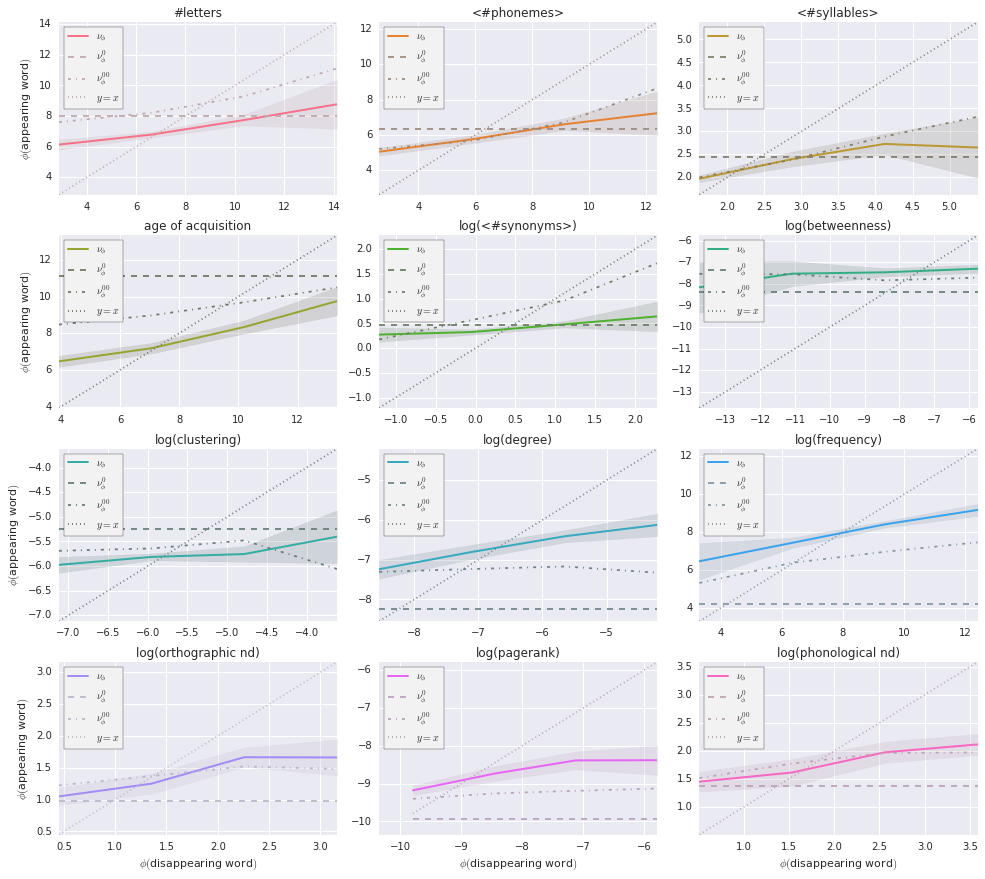

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

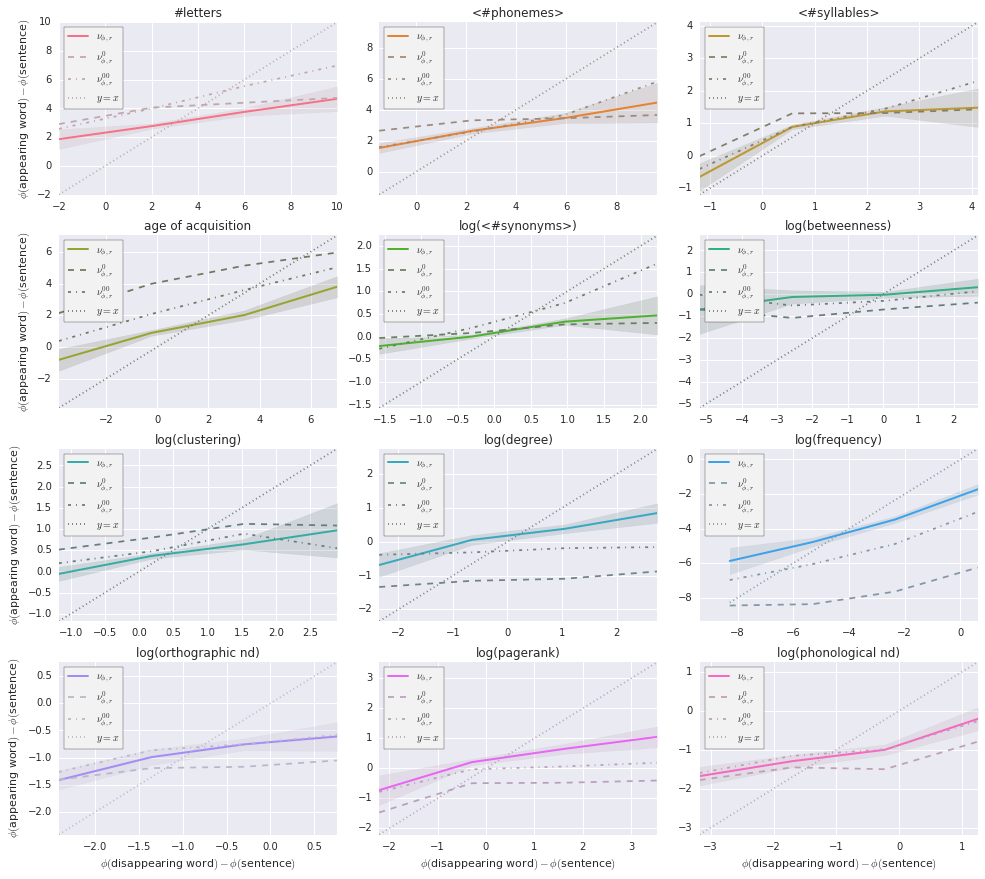

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

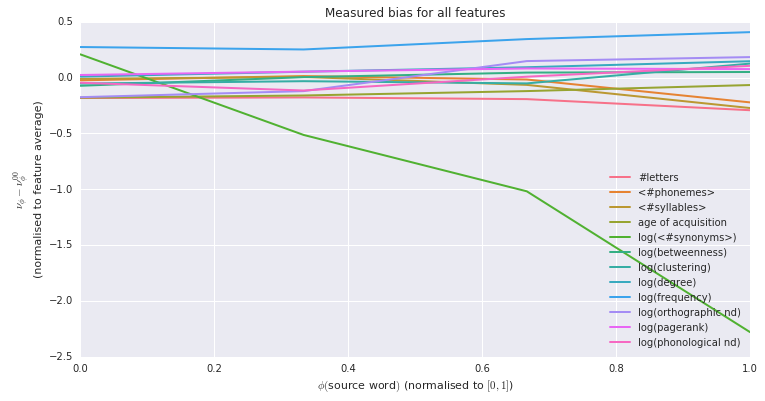

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

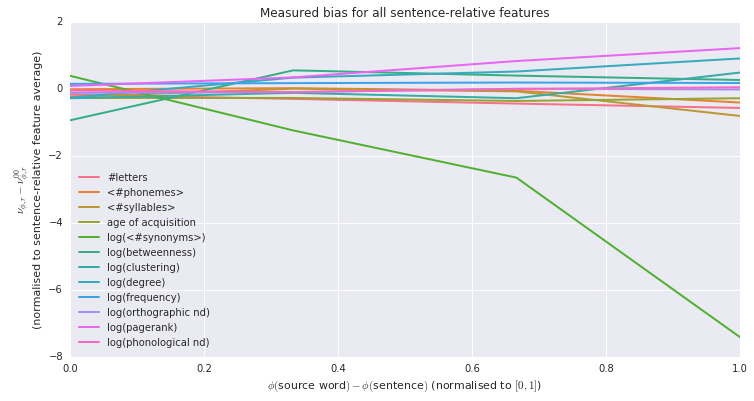

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

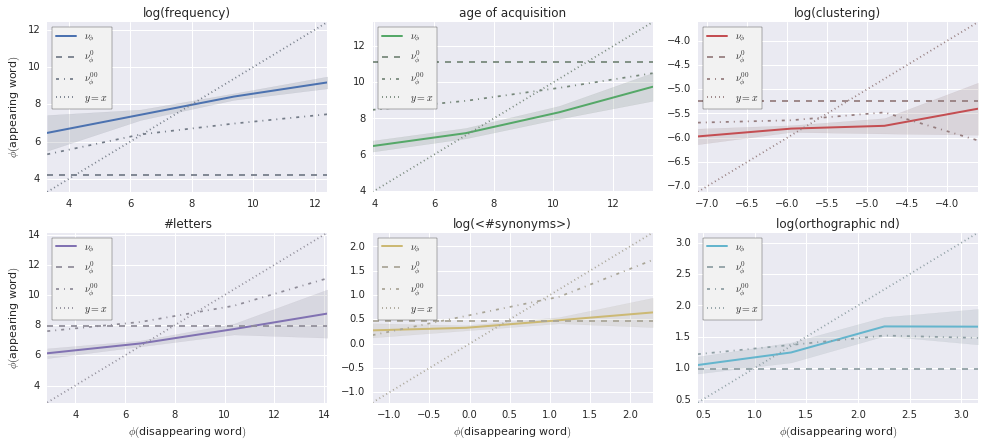

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

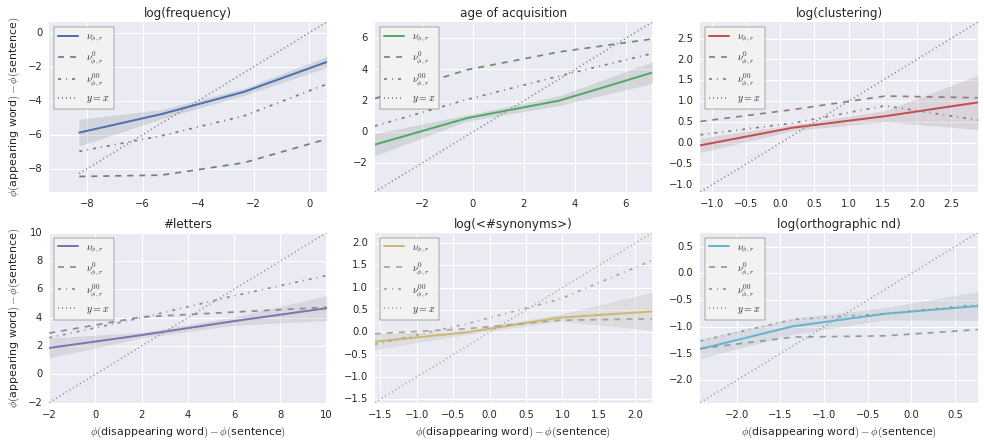

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

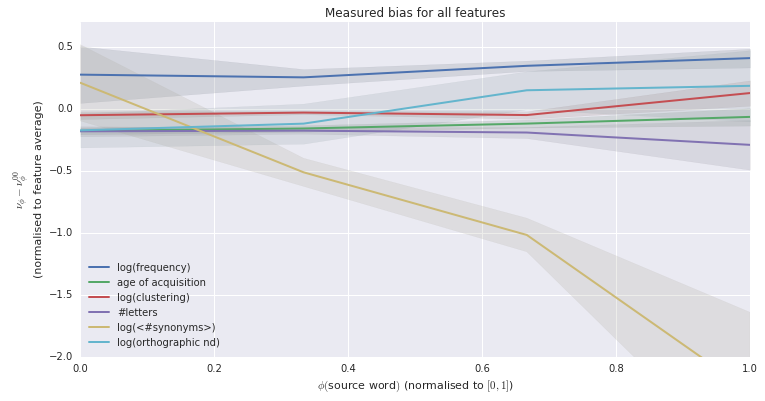

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

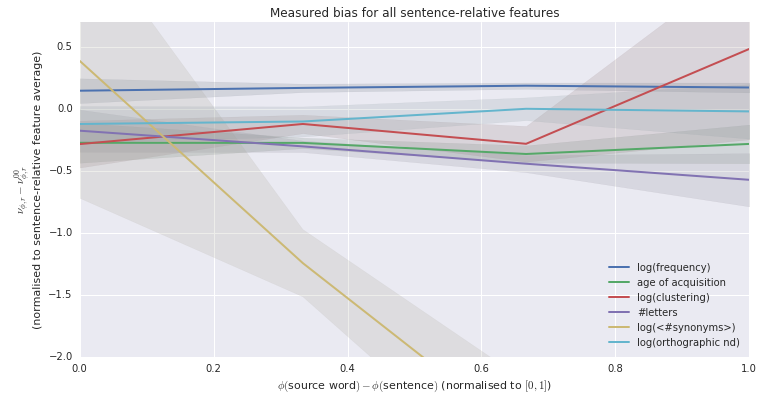

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


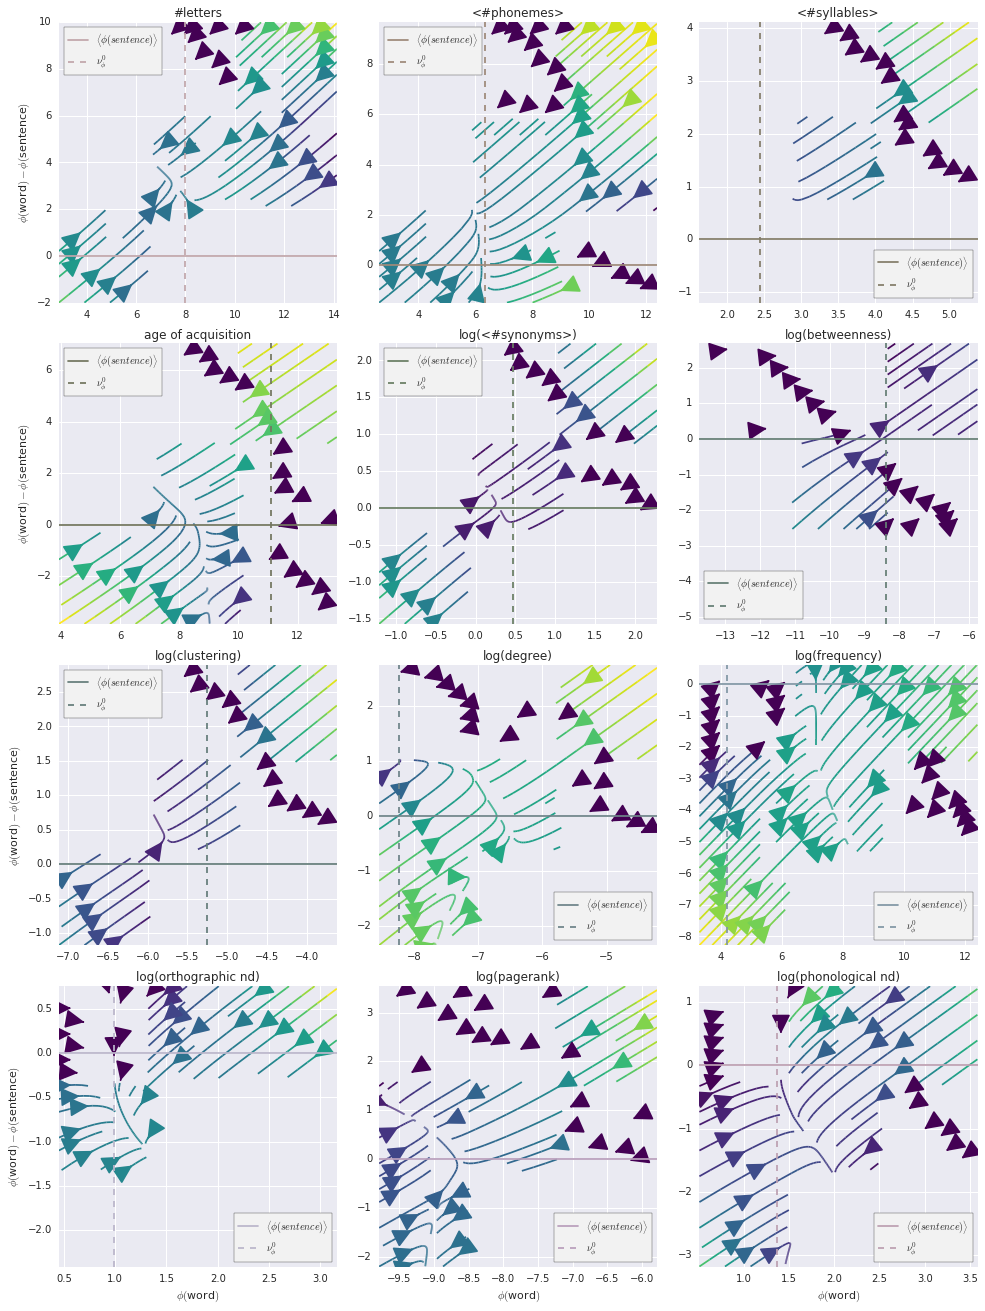

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


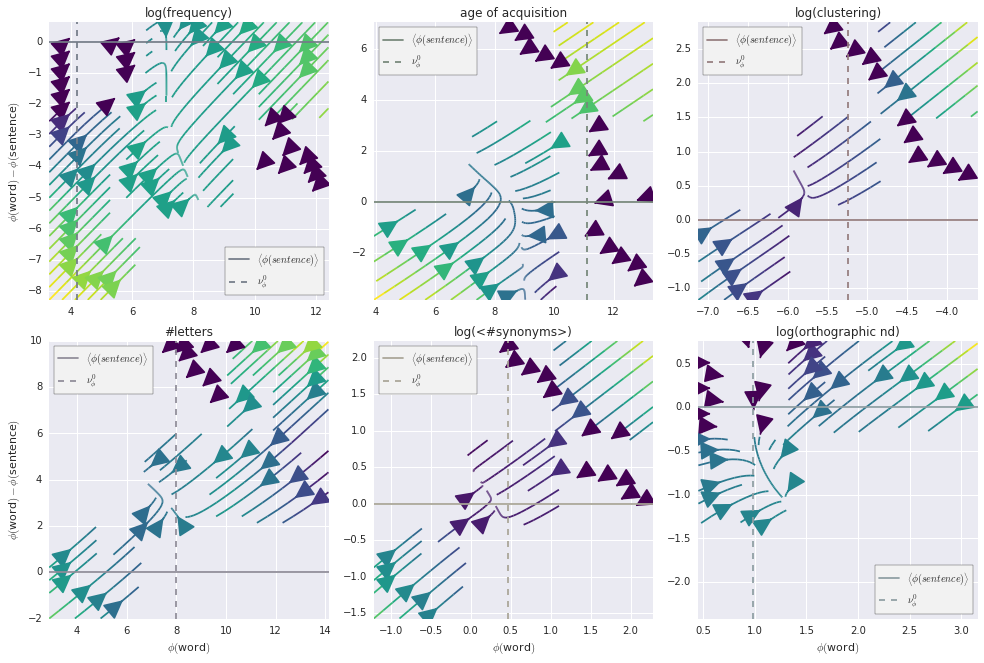

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.53647634  0.16030257  0.08634683  0.06841574  0.03729658  0.0323442
  0.02108444  0.01942355  0.01571669  0.00976155]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.441935,0.312615,-0.082701,0.249367,0.234408,-0.428654,0.219245,0.289865,-0.406908,0.275213,-0.160723,0.003410
Component-1,0.296614,-0.393999,0.137668,-0.275048,-0.301376,-0.413922,0.175496,-0.291227,-0.452626,0.224755,-0.169905,0.012543
Component-2,-0.614600,-0.009858,0.095807,-0.025003,-0.768745,0.130331,0.022904,0.001026,0.037826,-0.036887,-0.011273,0.031079


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 17616) |            | Elapsed Time: 0:00:40 ETA:  8 days, 7:11:50

  0% (  115 of 17616) |                    | Elapsed Time: 0:00:41 ETA:  0:01:53

  1% (  221 of 17616) |                    | Elapsed Time: 0:00:42 ETA:  0:01:37

  1% (  334 of 17616) |                    | Elapsed Time: 0:00:43 ETA:  0:01:41

  2% (  410 of 17616) |                    | Elapsed Time: 0:00:44 ETA:  0:01:57

  2% (  441 of 17616) |                    | Elapsed Time: 0:00:44 ETA:  0:01:57

  3% (  609 of 17616) |                    | Elapsed Time: 0:00:45 ETA:  0:01:40

  3% (  661 of 17616) |                    | Elapsed Time: 0:00:46 ETA:  0:01:39

  4% (  791 of 17616) |                    | Elapsed Time: 0:00:47 ETA:  0:01:36

  5% (  881 of 17616) |#                   | Elapsed Time: 0:00:47 ETA:  0:01:35

  5% ( 1023 of 17616) |#                   | Elapsed Time: 0:00:48 ETA:  0:01:29

  6% ( 1101 of 17616) |#                   | Elapsed Time: 0:00:49 ETA:  0:01:29

  7% ( 1245 of 17616) |#                   | Elapsed Time: 0:00:50 ETA:  0:01:24

  7% ( 1322 of 17616) |#                   | Elapsed Time: 0:00:50 ETA:  0:01:14

  8% ( 1472 of 17616) |#                   | Elapsed Time: 0:00:51 ETA:  0:01:11

  8% ( 1542 of 17616) |#                   | Elapsed Time: 0:00:52 ETA:  0:01:13

  9% ( 1696 of 17616) |#                   | Elapsed Time: 0:00:53 ETA:  0:01:10

 10% ( 1762 of 17616) |##                  | Elapsed Time: 0:00:53 ETA:  0:01:07

 10% ( 1917 of 17616) |##                  | Elapsed Time: 0:00:54 ETA:  0:01:03

 11% ( 1982 of 17616) |##                  | Elapsed Time: 0:00:55 ETA:  0:01:02

 12% ( 2116 of 17616) |##                  | Elapsed Time: 0:00:56 ETA:  0:01:02

 12% ( 2202 of 17616) |##                  | Elapsed Time: 0:00:56 ETA:  0:01:03

 13% ( 2322 of 17616) |##                  | Elapsed Time: 0:00:57 ETA:  0:01:05

 13% ( 2423 of 17616) |##                  | Elapsed Time: 0:00:59 ETA:  0:01:13

 14% ( 2518 of 17616) |##                  | Elapsed Time: 0:01:00 ETA:  0:01:22

 15% ( 2643 of 17616) |###                 | Elapsed Time: 0:01:01 ETA:  0:01:33

 15% ( 2775 of 17616) |###                 | Elapsed Time: 0:01:02 ETA:  0:01:32

 16% ( 2863 of 17616) |###                 | Elapsed Time: 0:01:02 ETA:  0:01:35

 16% ( 2978 of 17616) |###                 | Elapsed Time: 0:01:03 ETA:  0:01:35

 17% ( 3083 of 17616) |###                 | Elapsed Time: 0:01:04 ETA:  0:01:34

 18% ( 3233 of 17616) |###                 | Elapsed Time: 0:01:05 ETA:  0:01:22

 18% ( 3303 of 17616) |###                 | Elapsed Time: 0:01:06 ETA:  0:01:19

 19% ( 3459 of 17616) |###                 | Elapsed Time: 0:01:07 ETA:  0:01:08

 20% ( 3524 of 17616) |####                | Elapsed Time: 0:01:07 ETA:  0:01:02

 20% ( 3670 of 17616) |####                | Elapsed Time: 0:01:08 ETA:  0:01:01

 21% ( 3744 of 17616) |####                | Elapsed Time: 0:01:09 ETA:  0:00:58

 22% ( 3911 of 17616) |####                | Elapsed Time: 0:01:10 ETA:  0:00:52

 22% ( 3964 of 17616) |####                | Elapsed Time: 0:01:10 ETA:  0:00:47

 23% ( 4102 of 17616) |####                | Elapsed Time: 0:01:11 ETA:  0:00:44

 23% ( 4184 of 17616) |####                | Elapsed Time: 0:01:12 ETA:  0:00:49

 24% ( 4289 of 17616) |####                | Elapsed Time: 0:01:13 ETA:  0:00:53

 25% ( 4404 of 17616) |#####               | Elapsed Time: 0:01:14 ETA:  0:00:54

 25% ( 4504 of 17616) |#####               | Elapsed Time: 0:01:15 ETA:  0:00:58

 26% ( 4625 of 17616) |#####               | Elapsed Time: 0:01:16 ETA:  0:00:58

 27% ( 4776 of 17616) |#####               | Elapsed Time: 0:01:17 ETA:  0:00:56

 27% ( 4845 of 17616) |#####               | Elapsed Time: 0:01:17 ETA:  0:01:03

 28% ( 4966 of 17616) |#####               | Elapsed Time: 0:01:18 ETA:  0:01:04

 28% ( 5065 of 17616) |#####               | Elapsed Time: 0:01:19 ETA:  0:01:08

 29% ( 5196 of 17616) |#####               | Elapsed Time: 0:01:20 ETA:  0:01:02

 30% ( 5285 of 17616) |######              | Elapsed Time: 0:01:21 ETA:  0:01:01

 30% ( 5424 of 17616) |######              | Elapsed Time: 0:01:22 ETA:  0:00:54

 31% ( 5505 of 17616) |######              | Elapsed Time: 0:01:22 ETA:  0:00:53

 32% ( 5650 of 17616) |######              | Elapsed Time: 0:01:23 ETA:  0:00:53

 32% ( 5726 of 17616) |######              | Elapsed Time: 0:01:24 ETA:  0:00:50

 32% ( 5746 of 17616) |######              | Elapsed Time: 0:01:27 ETA:  0:01:46

 33% ( 5884 of 17616) |######              | Elapsed Time: 0:01:28 ETA:  0:01:34

 33% ( 5946 of 17616) |######              | Elapsed Time: 0:01:28 ETA:  0:01:34

 34% ( 6062 of 17616) |######              | Elapsed Time: 0:01:29 ETA:  0:01:36

 35% ( 6166 of 17616) |#######             | Elapsed Time: 0:01:31 ETA:  0:01:56

 35% ( 6305 of 17616) |#######             | Elapsed Time: 0:01:32 ETA:  0:01:50

 36% ( 6386 of 17616) |#######             | Elapsed Time: 0:01:32 ETA:  0:01:57

 36% ( 6515 of 17616) |#######             | Elapsed Time: 0:01:33 ETA:  0:01:53

 37% ( 6606 of 17616) |#######             | Elapsed Time: 0:01:34 ETA:  0:00:55

 38% ( 6719 of 17616) |#######             | Elapsed Time: 0:01:35 ETA:  0:00:59

 38% ( 6827 of 17616) |#######             | Elapsed Time: 0:01:36 ETA:  0:00:55

 39% ( 6944 of 17616) |#######             | Elapsed Time: 0:01:37 ETA:  0:00:54

 40% ( 7047 of 17616) |########            | Elapsed Time: 0:01:38 ETA:  0:00:50

 40% ( 7157 of 17616) |########            | Elapsed Time: 0:01:39 ETA:  0:00:49

 41% ( 7267 of 17616) |########            | Elapsed Time: 0:01:40 ETA:  0:00:51

 42% ( 7425 of 17616) |########            | Elapsed Time: 0:01:41 ETA:  0:00:46

 42% ( 7487 of 17616) |########            | Elapsed Time: 0:01:41 ETA:  0:00:45

 43% ( 7635 of 17616) |########            | Elapsed Time: 0:01:42 ETA:  0:00:38

 43% ( 7707 of 17616) |########            | Elapsed Time: 0:01:43 ETA:  0:00:35

 44% ( 7828 of 17616) |########            | Elapsed Time: 0:01:44 ETA:  0:00:33

 45% ( 7928 of 17616) |#########           | Elapsed Time: 0:01:45 ETA:  0:00:29

 45% ( 8072 of 17616) |#########           | Elapsed Time: 0:01:46 ETA:  0:00:24

 46% ( 8148 of 17616) |#########           | Elapsed Time: 0:01:46 ETA:  0:00:19

 47% ( 8286 of 17616) |#########           | Elapsed Time: 0:01:47 ETA:  0:00:16

 47% ( 8368 of 17616) |#########           | Elapsed Time: 0:01:48 ETA:  0:00:18

 48% ( 8504 of 17616) |#########           | Elapsed Time: 0:01:49 ETA:  0:00:18

 48% ( 8588 of 17616) |#########           | Elapsed Time: 0:01:49 ETA:  0:00:19

 49% ( 8715 of 17616) |#########           | Elapsed Time: 0:01:50 ETA:  0:00:18

 50% ( 8808 of 17616) |##########          | Elapsed Time: 0:01:51 ETA:  0:00:21

 50% ( 8942 of 17616) |##########          | Elapsed Time: 0:01:52 ETA:  0:00:21

 51% ( 9029 of 17616) |##########          | Elapsed Time: 0:01:53 ETA:  0:00:22

 52% ( 9172 of 17616) |##########          | Elapsed Time: 0:01:54 ETA:  0:00:21

 52% ( 9249 of 17616) |##########          | Elapsed Time: 0:01:55 ETA:  0:00:20

 53% ( 9394 of 17616) |##########          | Elapsed Time: 0:01:56 ETA:  0:00:17

 53% ( 9469 of 17616) |##########          | Elapsed Time: 0:01:56 ETA:  0:00:19

 54% ( 9595 of 17616) |##########          | Elapsed Time: 0:01:57 ETA:  0:00:18

 55% ( 9689 of 17616) |###########         | Elapsed Time: 0:01:58 ETA:  0:00:19

 55% ( 9833 of 17616) |###########         | Elapsed Time: 0:01:59 ETA:  0:00:12

 56% ( 9909 of 17616) |###########         | Elapsed Time: 0:02:00 ETA:  0:00:11

 56% (10031 of 17616) |###########         | Elapsed Time: 0:02:01 ETA:  0:00:11

 57% (10130 of 17616) |###########         | Elapsed Time: 0:02:01 ETA:  0:00:12

 58% (10269 of 17616) |###########         | Elapsed Time: 0:02:02 ETA:  0:00:12

 58% (10350 of 17616) |###########         | Elapsed Time: 0:02:03 ETA:  0:00:12

 59% (10479 of 17616) |###########         | Elapsed Time: 0:02:04 ETA:  0:00:10

 60% (10570 of 17616) |############        | Elapsed Time: 0:02:05 ETA:  0:00:08

 60% (10703 of 17616) |############        | Elapsed Time: 0:02:06 ETA:  0:00:05

 61% (10790 of 17616) |############        | Elapsed Time: 0:02:06 ETA:  0:00:03

 61% (10915 of 17616) |############        | Elapsed Time: 0:02:07 ETA:  0:00:03

 62% (11010 of 17616) |############        | Elapsed Time: 0:02:08 ETA:  0:00:02

 63% (11133 of 17616) |############        | Elapsed Time: 0:02:09 ETA:  0:00:02

 63% (11231 of 17616) |############        | Elapsed Time: 0:02:10 ETA:  0:00:02

 64% (11358 of 17616) |############        | Elapsed Time: 0:02:11 ETA:  0:00:02

 65% (11451 of 17616) |#############       | Elapsed Time: 0:02:11 ETA:  0:00:00

 65% (11576 of 17616) |#############       | Elapsed Time: 0:02:12 ETA:  0:00:01

 66% (11671 of 17616) |#############       | Elapsed Time: 0:02:13 ETA:  0:00:01

 67% (11805 of 17616) |#############       | Elapsed Time: 0:02:14 ETA:  0:00:02

 67% (11891 of 17616) |#############       | Elapsed Time: 0:02:15 ETA:  0:00:03

 68% (12015 of 17616) |#############       | Elapsed Time: 0:02:16 ETA:  0:00:02

 68% (12111 of 17616) |#############       | Elapsed Time: 0:02:16 ETA:  0:00:00

 69% (12258 of 17616) |#############       | Elapsed Time: 0:02:17 ETA:  0:00:00

 70% (12332 of 17616) |##############      | Elapsed Time: 0:02:18 ETA:  0:00:02

 70% (12446 of 17616) |##############      | Elapsed Time: 0:02:19 ETA:  0:00:05

 71% (12552 of 17616) |##############      | Elapsed Time: 0:02:20 ETA:  0:00:06

 72% (12695 of 17616) |##############      | Elapsed Time: 0:02:21 ETA:  0:00:02

 72% (12772 of 17616) |##############      | Elapsed Time: 0:02:22 ETA:  0:00:04

 73% (12917 of 17616) |##############      | Elapsed Time: 0:02:23 ETA:  0:00:00

 73% (12992 of 17616) |##############      | Elapsed Time: 0:02:24 ETA:  0:00:00

 74% (13120 of 17616) |##############      | Elapsed Time: 0:02:25 ETA:  0:00:00

 75% (13212 of 17616) |###############     | Elapsed Time: 0:02:25 ETA:  0:00:00

 75% (13359 of 17616) |###############     | Elapsed Time: 0:02:26 ETA:  0:00:00

 76% (13433 of 17616) |###############     | Elapsed Time: 0:02:27 ETA:  0:00:00

 76% (13561 of 17616) |###############     | Elapsed Time: 0:02:28 ETA:  0:00:00

 77% (13653 of 17616) |###############     | Elapsed Time: 0:02:29 ETA:  0:00:00

 78% (13785 of 17616) |###############     | Elapsed Time: 0:02:30 ETA:  0:00:00

 78% (13873 of 17616) |###############     | Elapsed Time: 0:02:30 ETA:  0:00:00

 79% (14000 of 17616) |###############     | Elapsed Time: 0:02:31 ETA:  0:00:00

 80% (14093 of 17616) |################    | Elapsed Time: 0:02:32 ETA:  0:00:00

 80% (14226 of 17616) |################    | Elapsed Time: 0:02:33 ETA:  0:00:00

 81% (14313 of 17616) |################    | Elapsed Time: 0:02:34 ETA:  0:00:00

 81% (14431 of 17616) |################    | Elapsed Time: 0:02:35 ETA:  0:00:00

 82% (14534 of 17616) |################    | Elapsed Time: 0:02:36 ETA:  0:00:00

 83% (14667 of 17616) |################    | Elapsed Time: 0:02:37 ETA:  0:00:00

 83% (14754 of 17616) |################    | Elapsed Time: 0:02:37 ETA:  0:00:00

 84% (14876 of 17616) |################    | Elapsed Time: 0:02:38 ETA:  0:00:00

 85% (14974 of 17616) |#################   | Elapsed Time: 0:02:39 ETA:  0:00:00

 85% (15095 of 17616) |#################   | Elapsed Time: 0:02:40 ETA:  0:00:00

 86% (15194 of 17616) |#################   | Elapsed Time: 0:02:41 ETA:  0:00:00

 87% (15333 of 17616) |#################   | Elapsed Time: 0:02:42 ETA:  0:00:00

 87% (15414 of 17616) |#################   | Elapsed Time: 0:02:42 ETA:  0:00:00

 88% (15532 of 17616) |#################   | Elapsed Time: 0:02:43 ETA:  0:00:00

 88% (15635 of 17616) |#################   | Elapsed Time: 0:02:44 ETA:  0:00:00

 89% (15765 of 17616) |#################   | Elapsed Time: 0:02:45 ETA:  0:00:00

 90% (15855 of 17616) |##################  | Elapsed Time: 0:02:46 ETA:  0:00:00

 90% (15996 of 17616) |##################  | Elapsed Time: 0:02:47 ETA:  0:00:00

 91% (16075 of 17616) |##################  | Elapsed Time: 0:02:47 ETA:  0:00:00

 91% (16206 of 17616) |##################  | Elapsed Time: 0:02:48 ETA:  0:00:00

 92% (16295 of 17616) |##################  | Elapsed Time: 0:02:49 ETA:  0:00:00

 93% (16433 of 17616) |##################  | Elapsed Time: 0:02:50 ETA:  0:00:00

 93% (16515 of 17616) |##################  | Elapsed Time: 0:02:51 ETA:  0:00:00

 94% (16641 of 17616) |##################  | Elapsed Time: 0:02:52 ETA:  0:00:00

 95% (16736 of 17616) |################### | Elapsed Time: 0:02:53 ETA:  0:00:00

 95% (16867 of 17616) |################### | Elapsed Time: 0:02:54 ETA:  0:00:00

 96% (16956 of 17616) |################### | Elapsed Time: 0:02:54 ETA:  0:00:00

 97% (17089 of 17616) |################### | Elapsed Time: 0:02:55 ETA:  0:00:00

 97% (17176 of 17616) |################### | Elapsed Time: 0:02:56 ETA:  0:00:00

 98% (17294 of 17616) |################### | Elapsed Time: 0:02:57 ETA:  0:00:00

 98% (17396 of 17616) |################### | Elapsed Time: 0:02:58 ETA:  0:00:00

 99% (17519 of 17616) |################### | Elapsed Time: 0:02:59 ETA:  0:00:00

100% (17616 of 17616) |####################| Elapsed Time: 0:02:59 Time: 0:02:59


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

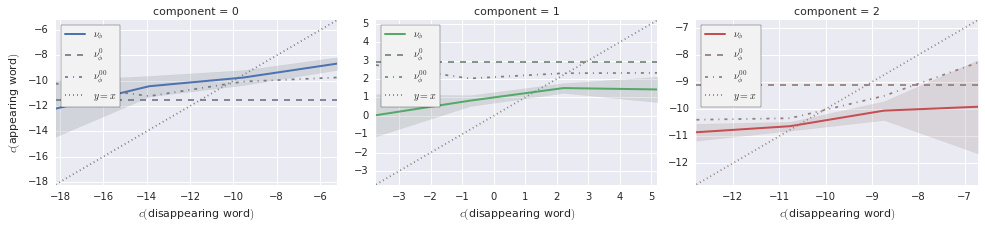

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 3 components.

Those explain the following variance:
[ 0.54975175  0.17671108  0.15853487]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.686308,-0.104314,0.351936,-0.558151,0.287385,0.010841
Component-1,0.395926,0.113324,-0.522420,-0.685471,0.295645,-0.014161
Component-2,-0.601732,0.092689,-0.756963,0.233043,-0.025171,0.037301


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 17616) |            | Elapsed Time: 0:00:11 ETA:  2 days, 8:58:01

  0% (  136 of 17616) |                    | Elapsed Time: 0:00:12 ETA:  0:01:58

  1% (  221 of 17616) |                    | Elapsed Time: 0:00:13 ETA:  0:01:47

  1% (  348 of 17616) |                    | Elapsed Time: 0:00:14 ETA:  0:01:53

  2% (  441 of 17616) |                    | Elapsed Time: 0:00:14 ETA:  0:01:57

  3% (  627 of 17616) |                    | Elapsed Time: 0:00:15 ETA:  0:01:45

  3% (  661 of 17616) |                    | Elapsed Time: 0:00:16 ETA:  0:01:45

  4% (  815 of 17616) |                    | Elapsed Time: 0:00:17 ETA:  0:01:42

  5% (  881 of 17616) |#                   | Elapsed Time: 0:00:17 ETA:  0:01:42

  5% ( 1040 of 17616) |#                   | Elapsed Time: 0:00:18 ETA:  0:01:39

  6% ( 1101 of 17616) |#                   | Elapsed Time: 0:00:19 ETA:  0:01:37

  7% ( 1256 of 17616) |#                   | Elapsed Time: 0:00:20 ETA:  0:01:36

  7% ( 1322 of 17616) |#                   | Elapsed Time: 0:00:20 ETA:  0:01:32

  8% ( 1482 of 17616) |#                   | Elapsed Time: 0:00:21 ETA:  0:01:28

  8% ( 1542 of 17616) |#                   | Elapsed Time: 0:00:21 ETA:  0:01:30

  9% ( 1703 of 17616) |#                   | Elapsed Time: 0:00:22 ETA:  0:01:29

 10% ( 1762 of 17616) |##                  | Elapsed Time: 0:00:23 ETA:  0:01:28

 10% ( 1923 of 17616) |##                  | Elapsed Time: 0:00:24 ETA:  0:01:26

 11% ( 1982 of 17616) |##                  | Elapsed Time: 0:00:24 ETA:  0:01:26

 12% ( 2131 of 17616) |##                  | Elapsed Time: 0:00:25 ETA:  0:01:26

 12% ( 2202 of 17616) |##                  | Elapsed Time: 0:00:26 ETA:  0:01:26

 13% ( 2338 of 17616) |##                  | Elapsed Time: 0:00:27 ETA:  0:01:27

 13% ( 2423 of 17616) |##                  | Elapsed Time: 0:00:27 ETA:  0:01:32

 14% ( 2534 of 17616) |##                  | Elapsed Time: 0:00:28 ETA:  0:01:36

 15% ( 2643 of 17616) |###                 | Elapsed Time: 0:00:29 ETA:  0:01:39

 15% ( 2795 of 17616) |###                 | Elapsed Time: 0:00:30 ETA:  0:01:37

 16% ( 2863 of 17616) |###                 | Elapsed Time: 0:00:31 ETA:  0:01:39

 17% ( 3002 of 17616) |###                 | Elapsed Time: 0:00:32 ETA:  0:01:39

 17% ( 3083 of 17616) |###                 | Elapsed Time: 0:00:32 ETA:  0:01:39

 18% ( 3255 of 17616) |###                 | Elapsed Time: 0:00:33 ETA:  0:01:34

 18% ( 3303 of 17616) |###                 | Elapsed Time: 0:00:34 ETA:  0:01:32

 19% ( 3475 of 17616) |###                 | Elapsed Time: 0:00:35 ETA:  0:01:25

 20% ( 3524 of 17616) |####                | Elapsed Time: 0:00:35 ETA:  0:01:20

 20% ( 3692 of 17616) |####                | Elapsed Time: 0:00:36 ETA:  0:01:14

 21% ( 3744 of 17616) |####                | Elapsed Time: 0:00:36 ETA:  0:01:13

 22% ( 3964 of 17616) |####                | Elapsed Time: 0:00:37 ETA:  0:01:05

 23% ( 4116 of 17616) |####                | Elapsed Time: 0:00:38 ETA:  0:01:05

 23% ( 4184 of 17616) |####                | Elapsed Time: 0:00:39 ETA:  0:01:07

 24% ( 4322 of 17616) |####                | Elapsed Time: 0:00:40 ETA:  0:01:09

 25% ( 4404 of 17616) |#####               | Elapsed Time: 0:00:40 ETA:  0:01:11

 25% ( 4531 of 17616) |#####               | Elapsed Time: 0:00:41 ETA:  0:01:13

 26% ( 4625 of 17616) |#####               | Elapsed Time: 0:00:42 ETA:  0:01:14

 27% ( 4790 of 17616) |#####               | Elapsed Time: 0:00:43 ETA:  0:01:12

 27% ( 4845 of 17616) |#####               | Elapsed Time: 0:00:43 ETA:  0:01:16

 28% ( 4986 of 17616) |#####               | Elapsed Time: 0:00:44 ETA:  0:01:17

 28% ( 5065 of 17616) |#####               | Elapsed Time: 0:00:45 ETA:  0:01:21

 29% ( 5218 of 17616) |#####               | Elapsed Time: 0:00:46 ETA:  0:01:17

 30% ( 5285 of 17616) |######              | Elapsed Time: 0:00:47 ETA:  0:01:14

 30% ( 5443 of 17616) |######              | Elapsed Time: 0:00:48 ETA:  0:01:12

 31% ( 5505 of 17616) |######              | Elapsed Time: 0:00:48 ETA:  0:01:08

 32% ( 5674 of 17616) |######              | Elapsed Time: 0:00:49 ETA:  0:01:06

 32% ( 5726 of 17616) |######              | Elapsed Time: 0:00:49 ETA:  0:01:07

 33% ( 5892 of 17616) |######              | Elapsed Time: 0:00:50 ETA:  0:01:03

 33% ( 5946 of 17616) |######              | Elapsed Time: 0:00:51 ETA:  0:01:03

 34% ( 6091 of 17616) |######              | Elapsed Time: 0:00:52 ETA:  0:01:00

 35% ( 6166 of 17616) |#######             | Elapsed Time: 0:00:52 ETA:  0:01:01

 35% ( 6334 of 17616) |#######             | Elapsed Time: 0:00:53 ETA:  0:01:00

 36% ( 6386 of 17616) |#######             | Elapsed Time: 0:00:54 ETA:  0:01:00

 37% ( 6544 of 17616) |#######             | Elapsed Time: 0:00:55 ETA:  0:01:00

 37% ( 6606 of 17616) |#######             | Elapsed Time: 0:00:55 ETA:  0:01:03

 38% ( 6745 of 17616) |#######             | Elapsed Time: 0:00:56 ETA:  0:01:04

 38% ( 6827 of 17616) |#######             | Elapsed Time: 0:00:57 ETA:  0:01:07

 39% ( 6962 of 17616) |#######             | Elapsed Time: 0:00:58 ETA:  0:01:05

 40% ( 7047 of 17616) |########            | Elapsed Time: 0:00:58 ETA:  0:01:06

 40% ( 7181 of 17616) |########            | Elapsed Time: 0:00:59 ETA:  0:01:04

 41% ( 7267 of 17616) |########            | Elapsed Time: 0:01:00 ETA:  0:01:06

 42% ( 7437 of 17616) |########            | Elapsed Time: 0:01:01 ETA:  0:01:02

 42% ( 7487 of 17616) |########            | Elapsed Time: 0:01:01 ETA:  0:01:03

 43% ( 7648 of 17616) |########            | Elapsed Time: 0:01:02 ETA:  0:00:58

 43% ( 7707 of 17616) |########            | Elapsed Time: 0:01:03 ETA:  0:00:57

 44% ( 7845 of 17616) |########            | Elapsed Time: 0:01:04 ETA:  0:00:56

 45% ( 7928 of 17616) |#########           | Elapsed Time: 0:01:04 ETA:  0:00:53

 45% ( 8085 of 17616) |#########           | Elapsed Time: 0:01:05 ETA:  0:00:50

 46% ( 8148 of 17616) |#########           | Elapsed Time: 0:01:06 ETA:  0:00:46

 47% ( 8300 of 17616) |#########           | Elapsed Time: 0:01:07 ETA:  0:00:45

 47% ( 8368 of 17616) |#########           | Elapsed Time: 0:01:07 ETA:  0:00:47

 48% ( 8522 of 17616) |#########           | Elapsed Time: 0:01:08 ETA:  0:00:46

 48% ( 8588 of 17616) |#########           | Elapsed Time: 0:01:09 ETA:  0:00:47

 49% ( 8726 of 17616) |#########           | Elapsed Time: 0:01:10 ETA:  0:00:47

 50% ( 8808 of 17616) |##########          | Elapsed Time: 0:01:10 ETA:  0:00:47

 50% ( 8955 of 17616) |##########          | Elapsed Time: 0:01:11 ETA:  0:00:47

 51% ( 9029 of 17616) |##########          | Elapsed Time: 0:01:12 ETA:  0:00:47

 52% ( 9191 of 17616) |##########          | Elapsed Time: 0:01:13 ETA:  0:00:45

 52% ( 9249 of 17616) |##########          | Elapsed Time: 0:01:13 ETA:  0:00:44

 53% ( 9414 of 17616) |##########          | Elapsed Time: 0:01:14 ETA:  0:00:42

 53% ( 9469 of 17616) |##########          | Elapsed Time: 0:01:14 ETA:  0:00:42

 54% ( 9613 of 17616) |##########          | Elapsed Time: 0:01:15 ETA:  0:00:42

 55% ( 9689 of 17616) |###########         | Elapsed Time: 0:01:16 ETA:  0:00:40

 55% ( 9847 of 17616) |###########         | Elapsed Time: 0:01:17 ETA:  0:00:36

 56% ( 9909 of 17616) |###########         | Elapsed Time: 0:01:17 ETA:  0:00:34

 57% (10052 of 17616) |###########         | Elapsed Time: 0:01:18 ETA:  0:00:35

 57% (10130 of 17616) |###########         | Elapsed Time: 0:01:19 ETA:  0:00:36

 58% (10291 of 17616) |###########         | Elapsed Time: 0:01:20 ETA:  0:00:35

 58% (10350 of 17616) |###########         | Elapsed Time: 0:01:20 ETA:  0:00:35

 59% (10497 of 17616) |###########         | Elapsed Time: 0:01:21 ETA:  0:00:34

 60% (10570 of 17616) |############        | Elapsed Time: 0:01:22 ETA:  0:00:32

 60% (10734 of 17616) |############        | Elapsed Time: 0:01:23 ETA:  0:00:29

 61% (10790 of 17616) |############        | Elapsed Time: 0:01:23 ETA:  0:00:28

 62% (10939 of 17616) |############        | Elapsed Time: 0:01:24 ETA:  0:00:28

 62% (11010 of 17616) |############        | Elapsed Time: 0:01:24 ETA:  0:00:27

 63% (11153 of 17616) |############        | Elapsed Time: 0:01:25 ETA:  0:00:28

 63% (11231 of 17616) |############        | Elapsed Time: 0:01:26 ETA:  0:00:27

 64% (11384 of 17616) |############        | Elapsed Time: 0:01:27 ETA:  0:00:26

 65% (11451 of 17616) |#############       | Elapsed Time: 0:01:27 ETA:  0:00:25

 65% (11597 of 17616) |#############       | Elapsed Time: 0:01:28 ETA:  0:00:25

 66% (11671 of 17616) |#############       | Elapsed Time: 0:01:29 ETA:  0:00:26

 67% (11822 of 17616) |#############       | Elapsed Time: 0:01:30 ETA:  0:00:26

 67% (11891 of 17616) |#############       | Elapsed Time: 0:01:30 ETA:  0:00:26

 68% (12040 of 17616) |#############       | Elapsed Time: 0:01:31 ETA:  0:00:25

 68% (12111 of 17616) |#############       | Elapsed Time: 0:01:32 ETA:  0:00:22

 69% (12266 of 17616) |#############       | Elapsed Time: 0:01:33 ETA:  0:00:22

 70% (12332 of 17616) |##############      | Elapsed Time: 0:01:33 ETA:  0:00:26

 70% (12470 of 17616) |##############      | Elapsed Time: 0:01:34 ETA:  0:00:27

 71% (12552 of 17616) |##############      | Elapsed Time: 0:01:35 ETA:  0:00:27

 72% (12714 of 17616) |##############      | Elapsed Time: 0:01:36 ETA:  0:00:25

 72% (12772 of 17616) |##############      | Elapsed Time: 0:01:36 ETA:  0:00:25

 73% (12932 of 17616) |##############      | Elapsed Time: 0:01:37 ETA:  0:00:22

 73% (12992 of 17616) |##############      | Elapsed Time: 0:01:38 ETA:  0:00:20

 74% (13143 of 17616) |##############      | Elapsed Time: 0:01:39 ETA:  0:00:20

 75% (13212 of 17616) |###############     | Elapsed Time: 0:01:39 ETA:  0:00:20

 75% (13376 of 17616) |###############     | Elapsed Time: 0:01:40 ETA:  0:00:14

 76% (13433 of 17616) |###############     | Elapsed Time: 0:01:41 ETA:  0:00:11

 77% (13584 of 17616) |###############     | Elapsed Time: 0:01:42 ETA:  0:00:09

 77% (13653 of 17616) |###############     | Elapsed Time: 0:01:42 ETA:  0:00:09

 78% (13806 of 17616) |###############     | Elapsed Time: 0:01:43 ETA:  0:00:08

 78% (13873 of 17616) |###############     | Elapsed Time: 0:01:43 ETA:  0:00:08

 79% (14019 of 17616) |###############     | Elapsed Time: 0:01:44 ETA:  0:00:10

 80% (14093 of 17616) |################    | Elapsed Time: 0:01:45 ETA:  0:00:09

 80% (14255 of 17616) |################    | Elapsed Time: 0:01:46 ETA:  0:00:07

 81% (14313 of 17616) |################    | Elapsed Time: 0:01:46 ETA:  0:00:09

 82% (14458 of 17616) |################    | Elapsed Time: 0:01:47 ETA:  0:00:09

 82% (14534 of 17616) |################    | Elapsed Time: 0:01:48 ETA:  0:00:09

 83% (14690 of 17616) |################    | Elapsed Time: 0:01:49 ETA:  0:00:07

 83% (14754 of 17616) |################    | Elapsed Time: 0:01:49 ETA:  0:00:07

 84% (14905 of 17616) |################    | Elapsed Time: 0:01:50 ETA:  0:00:06

 85% (14974 of 17616) |#################   | Elapsed Time: 0:01:51 ETA:  0:00:04

 85% (15120 of 17616) |#################   | Elapsed Time: 0:01:52 ETA:  0:00:03

 86% (15194 of 17616) |#################   | Elapsed Time: 0:01:52 ETA:  0:00:04

 87% (15360 of 17616) |#################   | Elapsed Time: 0:01:53 ETA:  0:00:00

 87% (15414 of 17616) |#################   | Elapsed Time: 0:01:54 ETA:  0:00:00

 88% (15566 of 17616) |#################   | Elapsed Time: 0:01:55 ETA:  0:00:00

 88% (15635 of 17616) |#################   | Elapsed Time: 0:01:55 ETA:  0:00:00

 89% (15782 of 17616) |#################   | Elapsed Time: 0:01:56 ETA:  0:00:00

 90% (15855 of 17616) |##################  | Elapsed Time: 0:01:56 ETA:  0:00:00

 90% (16019 of 17616) |##################  | Elapsed Time: 0:01:57 ETA:  0:00:00

 91% (16075 of 17616) |##################  | Elapsed Time: 0:01:58 ETA:  0:00:00

 92% (16230 of 17616) |##################  | Elapsed Time: 0:01:59 ETA:  0:00:00

 92% (16295 of 17616) |##################  | Elapsed Time: 0:01:59 ETA:  0:00:00

 93% (16459 of 17616) |##################  | Elapsed Time: 0:02:00 ETA:  0:00:00

 93% (16515 of 17616) |##################  | Elapsed Time: 0:02:01 ETA:  0:00:00

 94% (16663 of 17616) |##################  | Elapsed Time: 0:02:02 ETA:  0:00:00

 95% (16736 of 17616) |################### | Elapsed Time: 0:02:02 ETA:  0:00:00

 95% (16890 of 17616) |################### | Elapsed Time: 0:02:03 ETA:  0:00:00

 96% (16956 of 17616) |################### | Elapsed Time: 0:02:04 ETA:  0:00:00

 97% (17116 of 17616) |################### | Elapsed Time: 0:02:05 ETA:  0:00:00

 97% (17176 of 17616) |################### | Elapsed Time: 0:02:05 ETA:  0:00:00

 98% (17324 of 17616) |################### | Elapsed Time: 0:02:06 ETA:  0:00:00

 98% (17396 of 17616) |################### | Elapsed Time: 0:02:06 ETA:  0:00:00

 99% (17543 of 17616) |################### | Elapsed Time: 0:02:07 ETA:  0:00:00

100% (17616 of 17616) |####################| Elapsed Time: 0:02:08 Time: 0:02:08


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

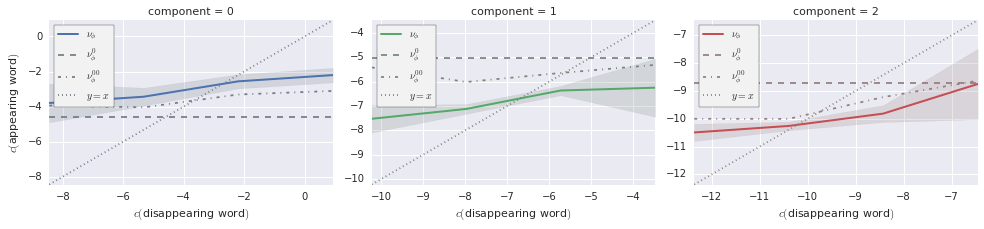

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1333 (cluster-unique) substitutions, but the PCA is in fact computed on 470 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.